In [ ]:
# 코드가 이것저것 추가하다보니 조금 이상해졌는데... ㅠㅠ 수정할 시간이 없어서 그냥 올립니다 ㅠ

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import statsmodels.api as sm

In [60]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx', header=0)

In [61]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [62]:
X = df.iloc[:, 0:16]
y = df.iloc[:, 16]

In [63]:
print(X.shape, y.shape)

(13611, 16) (13611,)


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [66]:
# 랜덤포레스트

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 300, random_state = 0)
forest.fit(X_train, y_train)
print("train set score is {:.3f}".format(forest.score(X_train, y_train)))
print("test set score is {:.3f}".format(forest.score(X_test, y_test)))

train set score is 1.000
test set score is 0.928


In [67]:
# 변수의 개수를 하나씩 늘려나가면서 정확도 체크.

for i in range(1,17):
    X = df.iloc[:, 0:i]
    y = df.iloc[:, 16]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    forest = RandomForestClassifier(n_estimators = 300, random_state = 0)
    forest.fit(X_train, y_train)
    
    print(i, "개 특성을 적용한 score: {:.3f}".format(forest.score(X_test, y_test)))

1 개 특성을 적용한 score: 0.552
2 개 특성을 적용한 score: 0.811
3 개 특성을 적용한 score: 0.912
4 개 특성을 적용한 score: 0.908
5 개 특성을 적용한 score: 0.910
6 개 특성을 적용한 score: 0.906
7 개 특성을 적용한 score: 0.906
8 개 특성을 적용한 score: 0.909
9 개 특성을 적용한 score: 0.912
10 개 특성을 적용한 score: 0.913
11 개 특성을 적용한 score: 0.919
12 개 특성을 적용한 score: 0.921
13 개 특성을 적용한 score: 0.918
14 개 특성을 적용한 score: 0.917
15 개 특성을 적용한 score: 0.918
16 개 특성을 적용한 score: 0.928


In [68]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 300))
sel.fit(X_train, y_train)

sel.get_support() # 모델이 중요하다고 생각한 변수

selected_feat= X_train.columns[(sel.get_support())]
selected_feat

Index(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Compactness', 'ShapeFactor1', 'ShapeFactor3'],
      dtype='object')

In [78]:
X_train_selctedfeat = X_train[(selected_feat)]
X_test_selctedfeat = X_test[(selected_feat)]

forest_selected = RandomForestClassifier(n_estimators = 300, random_state = 0)
forest_selected.fit(X_train_selctedfeat, y_train)

print("get_support 로 선택된 변수 8개를 사용한 점수: {:.3f}".format(forest_selected.score(X_test_selctedfeat, y_test)))

get_support 로 선택된 변수 8개를 사용한 점수: 0.909


In [79]:
bean_features = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4']

In [80]:
feature_names = pd.DataFrame(bean_features)
feature_importances = pd.DataFrame(forest.feature_importances_)
feature_im = pd.concat([feature_names, feature_importances], axis=1)
feature_im.columns = ['names', 'importances']
feature_im['importances'].sort_values()
feature_im = feature_im.sort_values('importances', ascending =False)
feature_im

,names,importances
1,Perimeter,0.102213
11,Compactness,0.095659
14,ShapeFactor3,0.092025
12,ShapeFactor1,0.084373
3,MinorAxisLength,0.076437
6,ConvexArea,0.075140
2,MajorAxisLength,0.073836
4,AspectRation,0.066941
5,Eccentricity,0.066352
7,EquivDiameter,0.057410


In [81]:
bean_features_sorted = feature_im['names'].to_list()

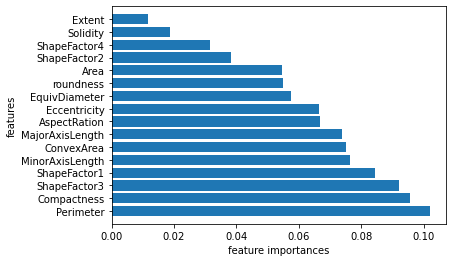

In [82]:
# 특성 중요도 알아보기.

def plot_feature_importances_beans(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), np.sort(model.feature_importances_)[::-1], align = 'center')
    plt.yticks(np.arange(n_features), bean_features_sorted)
    plt.xlabel("feature importances")
    plt.ylabel("features")
    plt.ylim(-1, n_features)
    
plot_feature_importances_beans(forest)

In [83]:
# 특성 중요도가 낮은 5개 항목 제거
bean_features_bottom_5 = feature_im['names'].tail(5)
bean_features_bottom_5 = bean_features_bottom_5.to_list()
bean_features_bottom_5

['Area', 'ShapeFactor2', 'ShapeFactor4', 'Solidity', 'Extent']

In [84]:
X_drop_5 = X.drop(bean_features_bottom_5, axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_drop_5, y, random_state=0)

# 랜덤포레스트 모델 실행
forest = RandomForestClassifier(n_estimators = 300, random_state = 0)
forest.fit(X_train, y_train)
print("drop 5 features model score is {:.3f}".format(forest.score(X_test, y_test)))

drop 5 features model score is 0.916


In [85]:
# 특성 중요도가 낮은 순서로 차례차례 제거

for i in range(16):
    bean_features_bottom = feature_im['names'].tail(i)
    bean_features_bottom = bean_features_bottom.to_list()
    
    X_drop = X.drop(bean_features_bottom, axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X_drop, y, random_state=0)
    
    forest = RandomForestClassifier(n_estimators = 300, random_state = 0)
    forest.fit(X_train, y_train)
    
    print(i, "개의 중요도 하위 특성을 제거한 score: {:.3f}".format(forest.score(X_test, y_test)))
    

0 개의 중요도 하위 특성을 제거한 score: 0.928
1 개의 중요도 하위 특성을 제거한 score: 0.923
2 개의 중요도 하위 특성을 제거한 score: 0.924
3 개의 중요도 하위 특성을 제거한 score: 0.916
4 개의 중요도 하위 특성을 제거한 score: 0.915
5 개의 중요도 하위 특성을 제거한 score: 0.916
6 개의 중요도 하위 특성을 제거한 score: 0.910
7 개의 중요도 하위 특성을 제거한 score: 0.907
8 개의 중요도 하위 특성을 제거한 score: 0.909
9 개의 중요도 하위 특성을 제거한 score: 0.909
10 개의 중요도 하위 특성을 제거한 score: 0.909
11 개의 중요도 하위 특성을 제거한 score: 0.909
12 개의 중요도 하위 특성을 제거한 score: 0.905
13 개의 중요도 하위 특성을 제거한 score: 0.881
14 개의 중요도 하위 특성을 제거한 score: 0.884
15 개의 중요도 하위 특성을 제거한 score: 0.548


In [86]:
score_dropbylow = []
for i in range(16):

    
    bean_features_bottom = feature_im['names'].tail(i)
    bean_features_bottom = bean_features_bottom.to_list()
    
    X_drop = X.drop(bean_features_bottom, axis = 1)
    
    X_train, X_test, y_train, y_test = train_test_split(X_drop, y, random_state=0)
    
    forest = RandomForestClassifier(n_estimators = 300, random_state = 0)
    forest.fit(X_train, y_train)
    
    score_dropbylow.append(forest.score(X_test, y_test))
    

print(score_dropbylow)



[0.9280047017337644, 0.9233029679694388, 0.9238906846899795, 0.9156626506024096, 0.9147810755215986, 0.9162503673229503, 0.9097854833970026, 0.9071407581545695, 0.9091977666764619, 0.9094916250367323, 0.9091977666764619, 0.9094916250367323, 0.905083749632677, 0.8809873640905084, 0.8836320893329416, 0.5480458419042021]


In [87]:
for i in range(1,17):
    X = df.iloc[:, 0:17-i]
    y = df.iloc[:, 16]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    forest = RandomForestClassifier(n_estimators = 300, random_state = 0)
    forest.fit(X_train, y_train)
    
    print(i-1, "개 특성을 무작위로 제거한 score: {:.3f}".format(forest.score(X_test, y_test)))

0 개 특성을 무작위로 제거한 score: 0.928
1 개 특성을 무작위로 제거한 score: 0.918
2 개 특성을 무작위로 제거한 score: 0.917
3 개 특성을 무작위로 제거한 score: 0.918
4 개 특성을 무작위로 제거한 score: 0.921
5 개 특성을 무작위로 제거한 score: 0.919
6 개 특성을 무작위로 제거한 score: 0.913
7 개 특성을 무작위로 제거한 score: 0.912
8 개 특성을 무작위로 제거한 score: 0.909
9 개 특성을 무작위로 제거한 score: 0.906
10 개 특성을 무작위로 제거한 score: 0.906
11 개 특성을 무작위로 제거한 score: 0.910
12 개 특성을 무작위로 제거한 score: 0.908
13 개 특성을 무작위로 제거한 score: 0.912
14 개 특성을 무작위로 제거한 score: 0.811
15 개 특성을 무작위로 제거한 score: 0.552


In [88]:
score_dropbyorder = []

for i in range(1, 17):

    X = df.iloc[:, 0:17-i]
    y = df.iloc[:, 16]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    
    forest = RandomForestClassifier(n_estimators = 300, random_state = 0)
    forest.fit(X_train, y_train)
    
    score_dropbyorder.append(forest.score(X_test, y_test))
    

print(score_dropbyorder)

[0.9280047017337644, 0.9180135174845724, 0.916838084043491, 0.9180135174845724, 0.9206582427270056, 0.9186012342051131, 0.9127240669997061, 0.9118424919188951, 0.9086100499559212, 0.9056714663532177, 0.9062591830737584, 0.910079341757273, 0.9077284748751102, 0.9118424919188951, 0.8107552159858948, 0.5515721422274463]


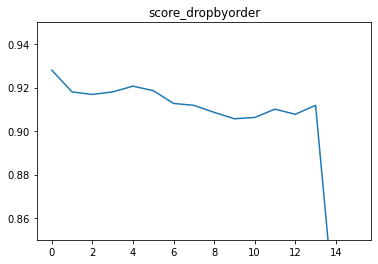

In [89]:
score_dropbyorder = pd.DataFrame(score_dropbyorder)

plt.plot(score_dropbyorder)
plt.ylim(0.85, 0.95)
plt.title("score_dropbyorder")
plt.show()

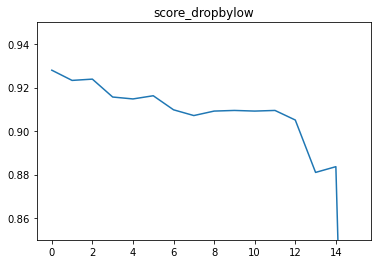

In [90]:
score_dropbylow = pd.DataFrame(score_dropbylow)

plt.plot(score_dropbylow)
plt.ylim(0.85, 0.95)
plt.title("score_dropbylow")
plt.show()



In [91]:
!pip install boruta
from boruta import BorutaPy

In [92]:
# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
# X = X.values
# y = y.values
# y = y.ravel()


In [44]:
###initialize Boruta
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 100 # number of trials to perform
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X), np.array(y))
### print results
green_area = X.columns[boruta.support_].to_list()
blue_area = X.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']
features in the blue area: []


In [45]:
### initialize hits counter
hits = np.zeros((len(X.columns)))
### repeat 20 times
for iter_ in range(20):
   ### make X_shadow by randomly permuting each column of X
   np.random.seed(iter_)
   X_shadow = X.apply(np.random.permutation)
   X_boruta = pd.concat([X, X_shadow], axis = 1)
   ### fit a random forest (suggested max_depth between 3 and 7)
   forest.fit(X_boruta, y)
   ### store feature importance
   feat_imp_X = forest.feature_importances_[:len(X.columns)]
   feat_imp_shadow = forest.feature_importances_[len(X.columns):]
   ### compute hits for this trial and add to counter
   hits += (feat_imp_X > feat_imp_shadow.max())

In [46]:
print(hits)

[20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]


In [ ]:
# Boruta => 모든 항목을 중요하다고 해서 실패. ;(